# Pymaceuticals Inc.
---

### Analysis

We have studied a group of 249 mice who were identified with SCC tumors and received treatment with different drugs.
 
Thanks to our analysis of the provided data, we were able to come up with precious information:
- We noticed that the drugs Capomulin and Ramicane have considerably bigger samples than the rest of them, having over 200 mice for each one of these drugs.
- We saw that 51% of mice are male and 49% are female.
We digged deeper into the Analysis of 4 medicaments: Capomulin, Ramicane, Infubinol, and Ceftamin. and were able to find out the following:
- The samples chosen for study are pretty reliable, as only 1 result hast been an outlier between all 4 drugs.
- Capomuline is an effective drug agains SCC tumors, as we see an significative decrease in the volume of the tumor over time.
- Finally, we could also deduct that due to the high correlation between the weight and the tumor voume of 0.84, we can clearly see that the higher the weight of the mouse is, the bigger the volume of the tumor will be.
 

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

pharma_data = mouse_metadata.merge(study_results, on =['Mouse ID'])
pharma_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
# Checking the number of mice.
pharma_data['Mouse ID'].nunique()

249

In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_ID = pharma_data.loc[pharma_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse_ID

array(['g989'], dtype=object)

In [78]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = pharma_data.set_index('Mouse ID').loc['g989']

g989_data

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dupp = pharma_data[pharma_data['Mouse ID'].isin(dup_mouse_ID)==False]
df_dupp.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [80]:
# Checking the number of mice in the clean DataFrame.
df_dupp['Mouse ID'].nunique()

248

## Summary Statistics

In [81]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = df_dupp['Tumor Volume (mm3)'].groupby(df_dupp['Drug Regimen']).mean()
median = df_dupp['Tumor Volume (mm3)'].groupby(df_dupp['Drug Regimen']).median()
var = df_dupp['Tumor Volume (mm3)'].groupby(df_dupp['Drug Regimen']).var()
std = df_dupp['Tumor Volume (mm3)'].groupby(df_dupp['Drug Regimen']).std()
sem = df_dupp['Tumor Volume (mm3)'].groupby(df_dupp['Drug Regimen']).sem()

stats_per_regimen = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
stats_per_regimen


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [82]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_per_regimen_agg =  df_dupp.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
stats_per_regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_count = df_dupp["Drug Regimen"].value_counts()

mouse_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

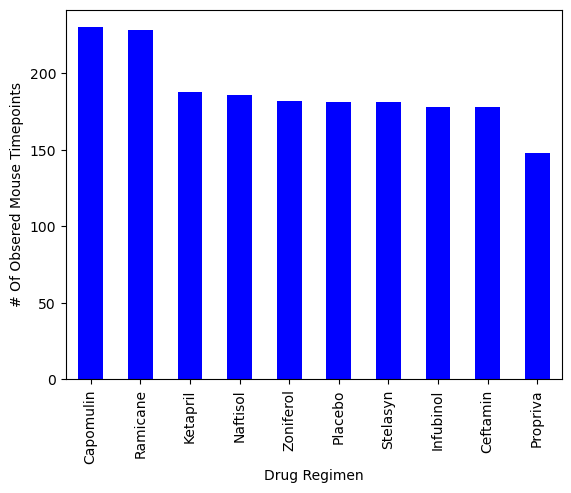

In [84]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mouse_count.plot.bar(color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Obsered Mouse Timepoints")
plt.show()

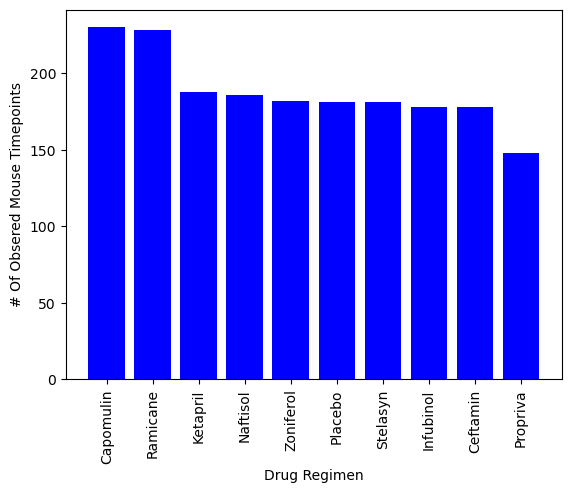

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_count.index.values
y_axis = mouse_count.values
plt.bar(x_axis, y_axis, color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Obsered Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

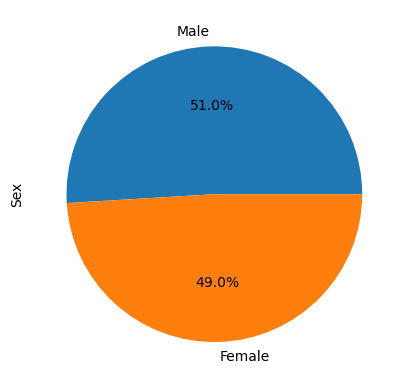

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = df_dupp["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

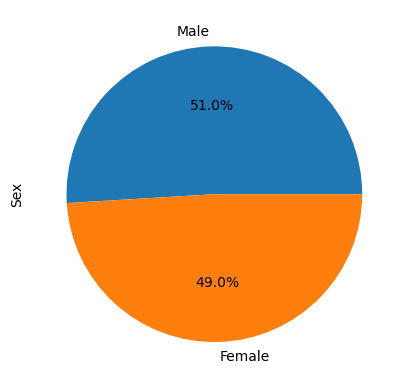

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 51]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = df_dupp.loc[df_dupp["Drug Regimen"] == "Capomulin",:]
ramicane_df = df_dupp.loc[df_dupp["Drug Regimen"] == "Ramicane", :]
infubinol_df = df_dupp.loc[df_dupp["Drug Regimen"] == "Infubinol", :]
ceftamin_df = df_dupp.loc[df_dupp["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']




In [89]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, df_dupp, on=("Mouse ID","Timepoint"),how="left")
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
capomulin_tumors
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, df_dupp, on=("Mouse ID","Timepoint"),how="left")
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, df_dupp, on=("Mouse ID","Timepoint"),how="left")
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]
infubinol_tumors
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, df_dupp, on=("Mouse ID","Timepoint"),how="left")
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]
ceftamin_tumors
frames = [capomulin_merge, ramicane_merge, infubinol_merge,ceftamin_merge]

result = pd.concat(frames)
result

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
20,x226,0,Ceftamin,Male,23,28,45.000000,0
21,x581,45,Ceftamin,Female,19,28,64.634949,3
22,x822,45,Ceftamin,Male,3,29,61.386660,3
23,y769,45,Ceftamin,Female,6,27,68.594745,4


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = mouse_count.index.values
treatments
# Create empty list to fill with tumor vol data (for plotting)
tummor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f'---------------------------------------------------')

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f'---------------------------------------------------')

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f'---------------------------------------------------')

quartiles =ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------------------
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------------------------------------------
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.7414455900

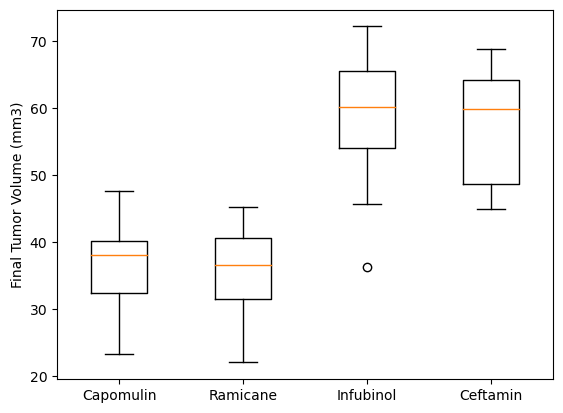

In [91]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_plot_box = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
treatment_group = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data_plot_box, labels=treatment_group) #, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

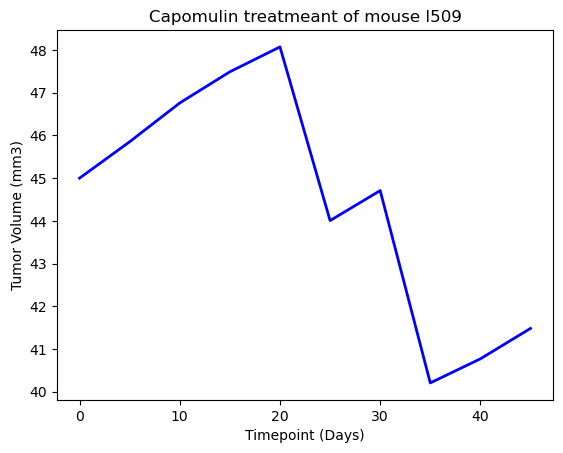

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
#mouse_l509_df.head()
x_axis = mouse_l509_df["Timepoint"]
y_axis = mouse_l509_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,linewidth=2, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

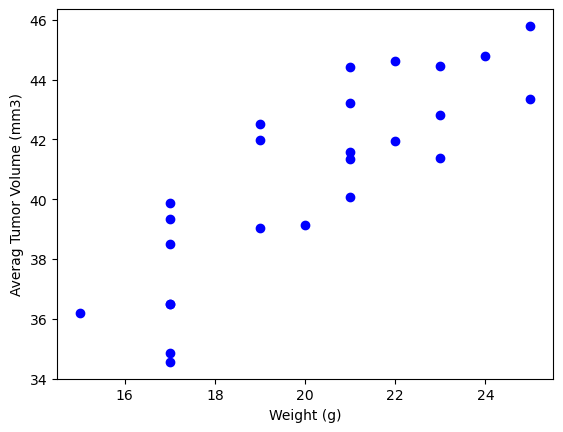

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
capomulin_average_volume =capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

marker_size=15
plt.scatter(capomulin_average_volume['Weight (g)'],capomulin_average_volume['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


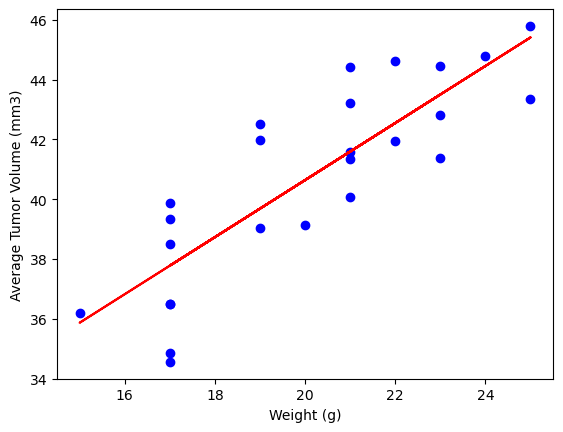

In [112]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
(slope, intercept,rvalue, pvalue, stderr)= linregress(capomulin_average_volume["Weight (g)"],capomulin_average_volume["Tumor Volume (mm3)"])
regression_values=capomulin_average_volume["Weight (g)"]* slope + intercept
equation_line= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
correlation = st.pearsonr(capomulin_average_volume['Weight (g)'],capomulin_average_volume['Tumor Volume (mm3)'])
plt.scatter(capomulin_average_volume["Weight (g)"],capomulin_average_volume["Tumor Volume (mm3)"],color='blue')
plt.plot(capomulin_average_volume["Weight (g)"], regression_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()